### 问题 1 通过计算一维傅里叶变换实现图像二维快速傅里叶变换(20 分)


实现一个函数 F = dft2D(f), 其中 f 是一个灰度源图像，F 是其对应的二维快速傅里叶变换 (FFT)图像. 具体实现要求按照课上的介绍通过两轮一维傅里叶变换实现。也就是首先计算 源图像每一行的一维傅里叶变换，然后对于得到的结果计算其每一列的一维傅里叶变换。
如果实现采用 MATLAB, 可以直接调用函数 fft 计算一维傅里叶变换。如果采用 Python，请 选择并直接调用相应的例如 NumPy 或者 SciPy 软件包中的一维傅里叶变换函数。

#### 代码实现：
- 复制图像并转换为复数格式为傅立叶变换做准备
- 对图像的每一行进行一维傅立叶变换
- 对图像的每一列进行一维傅立叶变换
- 返回傅立叶变换后的图像

#### 执行指引：
请运行下方代码块中的代码对函数进行定义，前提是numpy在runtime中已经被安装。

In [1]:
import numpy as np

def dft2D(f):
    # Step 1: Copy the image and convert to complex format to prepare for the FFT
    f_copy = f.copy()
    f_complex = np.array(f_copy, dtype=complex)

    # Step 2: Perform the 1D FFT on each row
    F_intermediate = np.fft.fft(f_complex, axis=0)

    # Step 3: Perform the 1D FFT on each column of the intermediate result
    F = np.fft.fft(F_intermediate, axis=1)

    return F


### 问题 2 图像二维快速傅里叶逆变换 (20 分)

实现一个函数 f = idft2D(F), 其中 F 是一个灰度图像的傅里叶变换，f 是其对应的二维快速 傅里叶逆变换 (IFFT)图像，也就是灰度源图像. 具体实现要求按照课上的介绍通过类似正向 变换的方式实现。


####  代码实现
- 对原始图像取共轭
- 对图像的每一行进行一维傅立叶变换
- 对图像的每一列进行一维傅立叶变换
- 再对图像取共轭
- 将图像除以图像的大小，即元素个数
#### 执行指引：
请运行下方代码块中的代码对函数进行定义，前提是numpy在runtime中已经被安装。

In [2]:
import numpy as np

def idft2D(F):
    """
    Endlish:
    Implement the 2D inverse Fourier transform (do not use the ifft function of numpy directly)
    Parameters:
        F: Fourier transform result of grayscale image
    Return:
        Inverse Fourier transform result
    """


    # Step 1: Take the conjugate of F
    F_conj = np.conj(F)

    # Step 2: Apply 1D FFT on each row

    F_intermediate = np.fft.fft(F_conj, axis=0)


    # Step 3: Apply 1D FFT on each column of the result in Step 2
    f_intermediate = np.fft.fft(F_intermediate, axis=1)


    # Step 4: Divide by the total number of elements MN and take the conjugate of the result in Step 3, the two operations are interchangeable
    MN = F.size
    f = np.conj(f_intermediate) / MN

    # Step 5: Take the real part of the result in Step 4,discard the imaginary part
    return f.real


### 问题 3 测试图像二维快速傅里叶变换与逆变换 (20 分)
对于给定的输入图像 rose512.tif, 首先将其灰度范围通过归一化调整到[0,1]. 将此归一化的 图像记为 f. 首先调用问题 1 下实现的函数 dft2D 计算其傅里叶变换，记为 F。然后调用问题 2 下的函数 idft2D 计算 F 的傅里叶逆变换，记为 g. 计算并显示误差图像 d = f - g.

#### 代码实现：
- 读取图像并进行归一化
- 对图像进行二维傅立叶变换，保存结果
- 对二维傅立叶变换的结果进行逆变换，保存结果
- 计算误差图像，保存结果
- 显示图像，创建子图，显示原始图像，傅立叶变换后的图像，逆变换后的图像，误差图像

#### 执行指引：
请确保问题1和问题2中的函数已经被定义，然后运行下方代码块中的代码，按照代码块的顺序执行即可。

In [3]:
# make sure the nessary packages are imported
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [4]:
# define the function to test the functions above
def test_on_above(image_normalized):
    """
    Custom main function for problem 3 with different plotting and saving methods.
    """
    # 2D FFT
    img_fft = dft2D(image_normalized)

    # 2D IFFT 
    img_ifft = idft2D(img_fft)

    # Calculate difference
    img_diff = image_normalized - img_ifft

    # Create a figure with subplots
    fig, axs = plt.subplots(2, 2, figsize=(8, 8))

    # Original Image
    axs[0, 0].set_title("Original")
    axs[0, 0].imshow(image_normalized, cmap='gray')
    axs[0, 0].axis('off')

    # FFT  Spectrum
    axs[0, 1].set_title("FFT Spectrum")
    axs[0, 1].imshow(np.log(np.abs(img_fft) + 1), cmap='gray')
    axs[0, 1].axis('off')

    # Reconstructed Image (IFFT)
    axs[1, 0].set_title("Reconstructed (IFFT)")
    axs[1, 0].imshow(img_ifft, cmap='gray')
    axs[1, 0].axis('off')

    # Difference Image
    axs[1, 1].set_title("Difference")
    axs[1, 1].imshow(np.round(img_diff), cmap='gray')
    axs[1, 1].axis('off')

    # Adjust layout
    plt.tight_layout()

    # Save the figure
    output_filepath = "problem3.png"
    plt.savefig(output_filepath)
    
    # Display the figure
    plt.show()

    # Return the path to the saved figure
    return output_filepath


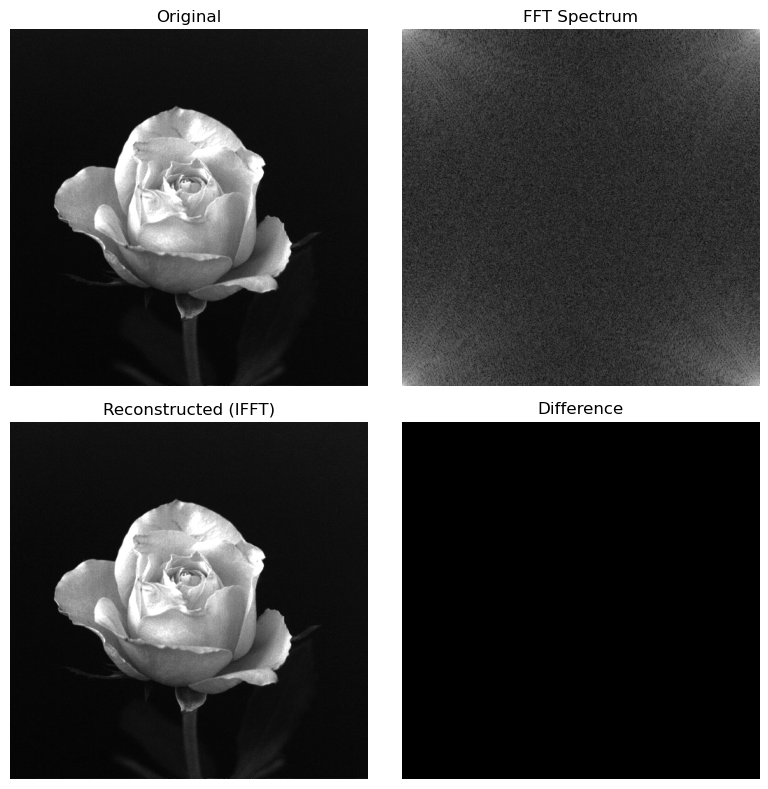

'problem3.png'

In [5]:
# Read the image 
img = cv2.imread("rose512.tif", cv2.IMREAD_GRAYSCALE)
img = img.astype(np.float64) / 255.0

# Call the test function
output_file_path = test_on_above(img)

output_file_path

### 结果显示与分析：
从图中可以看出，经过傅立叶变换和逆变换后，差值图像基本是全黑的，说明经过傅立叶变换和逆变换后，图像基本没有变化，说明傅立叶变换和逆变换被正确的实现了。

### 问题 4 计算图像的中心化二维快速傅里叶变换与谱图像 (20 分) 

我们的目标是复现下图中的结果。首先合成矩形物体图像，建议图像尺寸为 512×512，矩 形位于图像中心，建议尺寸为 60 像素长，10 像素宽，灰度假设已归一化设为 1. 对于输入 图像f计算其中心化二维傅里叶变换F。然后计算对应的谱图像S=log(1+abs(F)). 显示该谱 图像。


#### 代码实现：
- 生成矩形物体图像
- 对图像进行二维傅立叶变换
- 对傅立叶变换后的图像进行中心化
-  计算谱图像
-  显示原始图像，傅立叶变换后的图像，中心化后的图像，谱图像

#### 执行指引：
请确保问题1和问题2中的函数已经被定义，然后运行下方代码块中的代码，按照代码块的顺序执行即可。

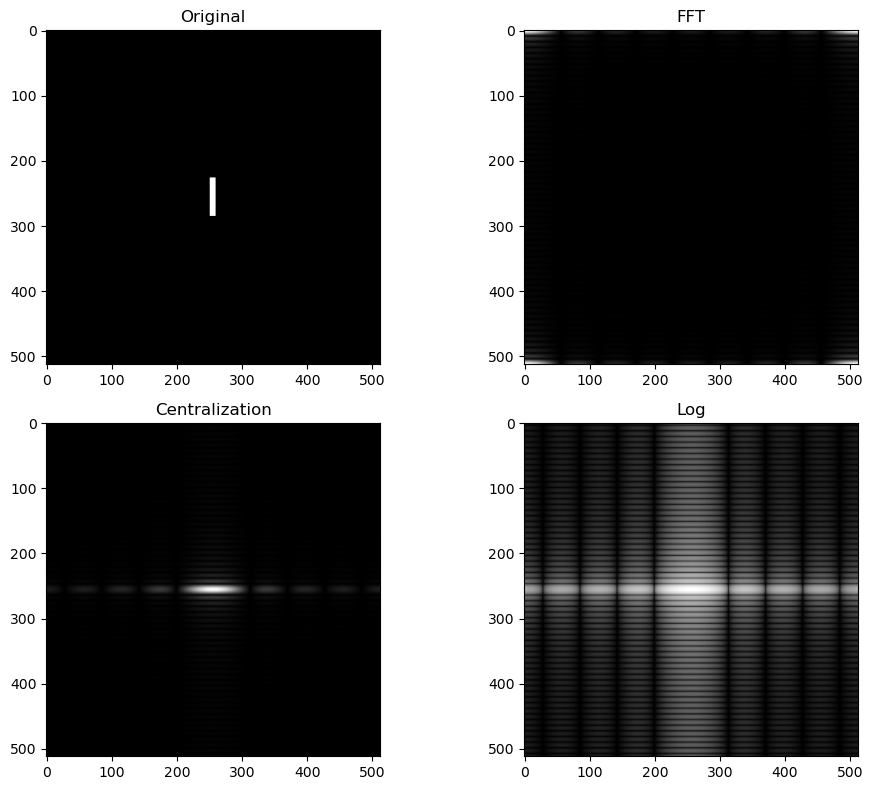

In [6]:

def centralize_dft2D():

    # Generate the image
    img = np.zeros([512, 512], dtype=float)
    img[226:285, 251:260] = 1.  # White rectangle with normalized intensity

    # FFT without centralization
    img_fft = dft2D(img)


    # Copy the image for centralization
    img_fft_c =  img.copy()

    # Centralization of the image before FFT
    img_fft_c = img_fft_c * ((-1) ** (np.indices(img.shape).sum(axis=0)))

    # FFT 
    img_fft_c = dft2D(img_fft_c)


    # Logarithmic transformation
    img_fft_clog = np.log( 1+ np.abs(img_fft_c))

    # Create a figure with subplots
    fig, axs = plt.subplots(2, 2, figsize=(10, 8))

    # Original Image
    axs[0, 0].imshow(img, cmap='gray')
    axs[0, 0].set_title("Original")

    # FFT Magnitude Spectrum
    axs[0, 1].imshow(np.abs(img_fft), cmap='gray')
    axs[0, 1].set_title("FFT")

    # Centralized FFT Magnitude Spectrum
    axs[1, 0].imshow(np.abs(img_fft_c), cmap='gray')
    axs[1, 0].set_title("Centralization")

    # Logarithmic Spectrum
    axs[1, 1].imshow(img_fft_clog, cmap='gray')
    axs[1, 1].set_title("Log")

    # Adjust layout and display
    plt.tight_layout()
    plt.savefig("problem4.png")
    plt.show()
  

# Run the main function with custom dft2D implementation
centralize_dft2D()


### 问题 5 测试更多图像的二维快速傅里叶变换 (20 分)
计算其他 5 幅图像的二维快速傅里叶变换:house.tif, house02.tif, lena_gray_512.tif, lunar_surface.tif, characters_test_pattern.tif。注意，有些图像的尺寸不是 2 的整数次幂，需要 进行相应的像素填补处理。如果图像有多个通道可以选择其中的一个通道进行计算。

#### 代码实现：
- 读取图像文件。
- 如果图像是彩色的，将其转换为灰度图像。
- 记录并保存每张图像的原始尺寸。
- 定义一个函数，检查图像的尺寸是否为 2 的整数次幂。如果不是，则通过添加零将图像补全为最近的尺寸。
- 对每张补全尺寸后的图像进行二维傅立叶变换。
- 使用 matplotlib 展示原始图像和傅立叶变换后的幅度频谱图。
- 保存傅立叶变换后的幅度频谱图到文件。

#### 执行指引：

按照顺序依次运行下方代码块中的代码即可。

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to read and preprocess an image
def preprocess_image(file_path):
    # Read the image using OpenCV
    image = cv2.imread(file_path, cv2.IMREAD_UNCHANGED)

    # If the image has more than 1 channel (i.e., not grayscale), convert to grayscale
    if len(image.shape) > 2 and image.shape[2] == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Record the original size
    original_size = image.shape
    
    # Pad the image if not already in the size of 2's power
    # Find the next power of 2 for each dimension
    h, w = image.shape
    h_padded = 2**np.ceil(np.log2(h))
    w_padded = 2**np.ceil(np.log2(w))

    # Find the maximum dimension，make sure the image is square
    max_padded = max(h_padded, w_padded)
    padded_size = (int(max_padded), int(max_padded))

    # Pad the image with zeros to the next power of 2
    image_padded = np.zeros(padded_size)
    image_padded[:h, :w] = image

    return image, image_padded, original_size, padded_size

# We will now read and preprocess each image and store their information in a dictionary for later use
image_paths = [ 'lunar_surface.tif', 
               'lena_gray_512.tif', 'house02.tif', 
               'house.tif', 'Characters_test_pattern.tif']

images_info = {}

for path in image_paths:
    # Preprocess the image
    image, image_padded, original_size, padded_size = preprocess_image(path)
    
    # Store the results in the dictionary
    images_info[path] = {
        'original_image': image,
        'padded_image': image_padded,
        'original_size': original_size,
        'padded_size': padded_size
    }

# print to check if the images are padded correctly
for img_info in images_info.values():
    print(img_info['original_size'], img_info['padded_size'])


(474, 630) (1024, 1024)
(512, 512) (512, 512)
(600, 600) (1024, 1024)
(512, 512) (512, 512)
(688, 688) (1024, 1024)


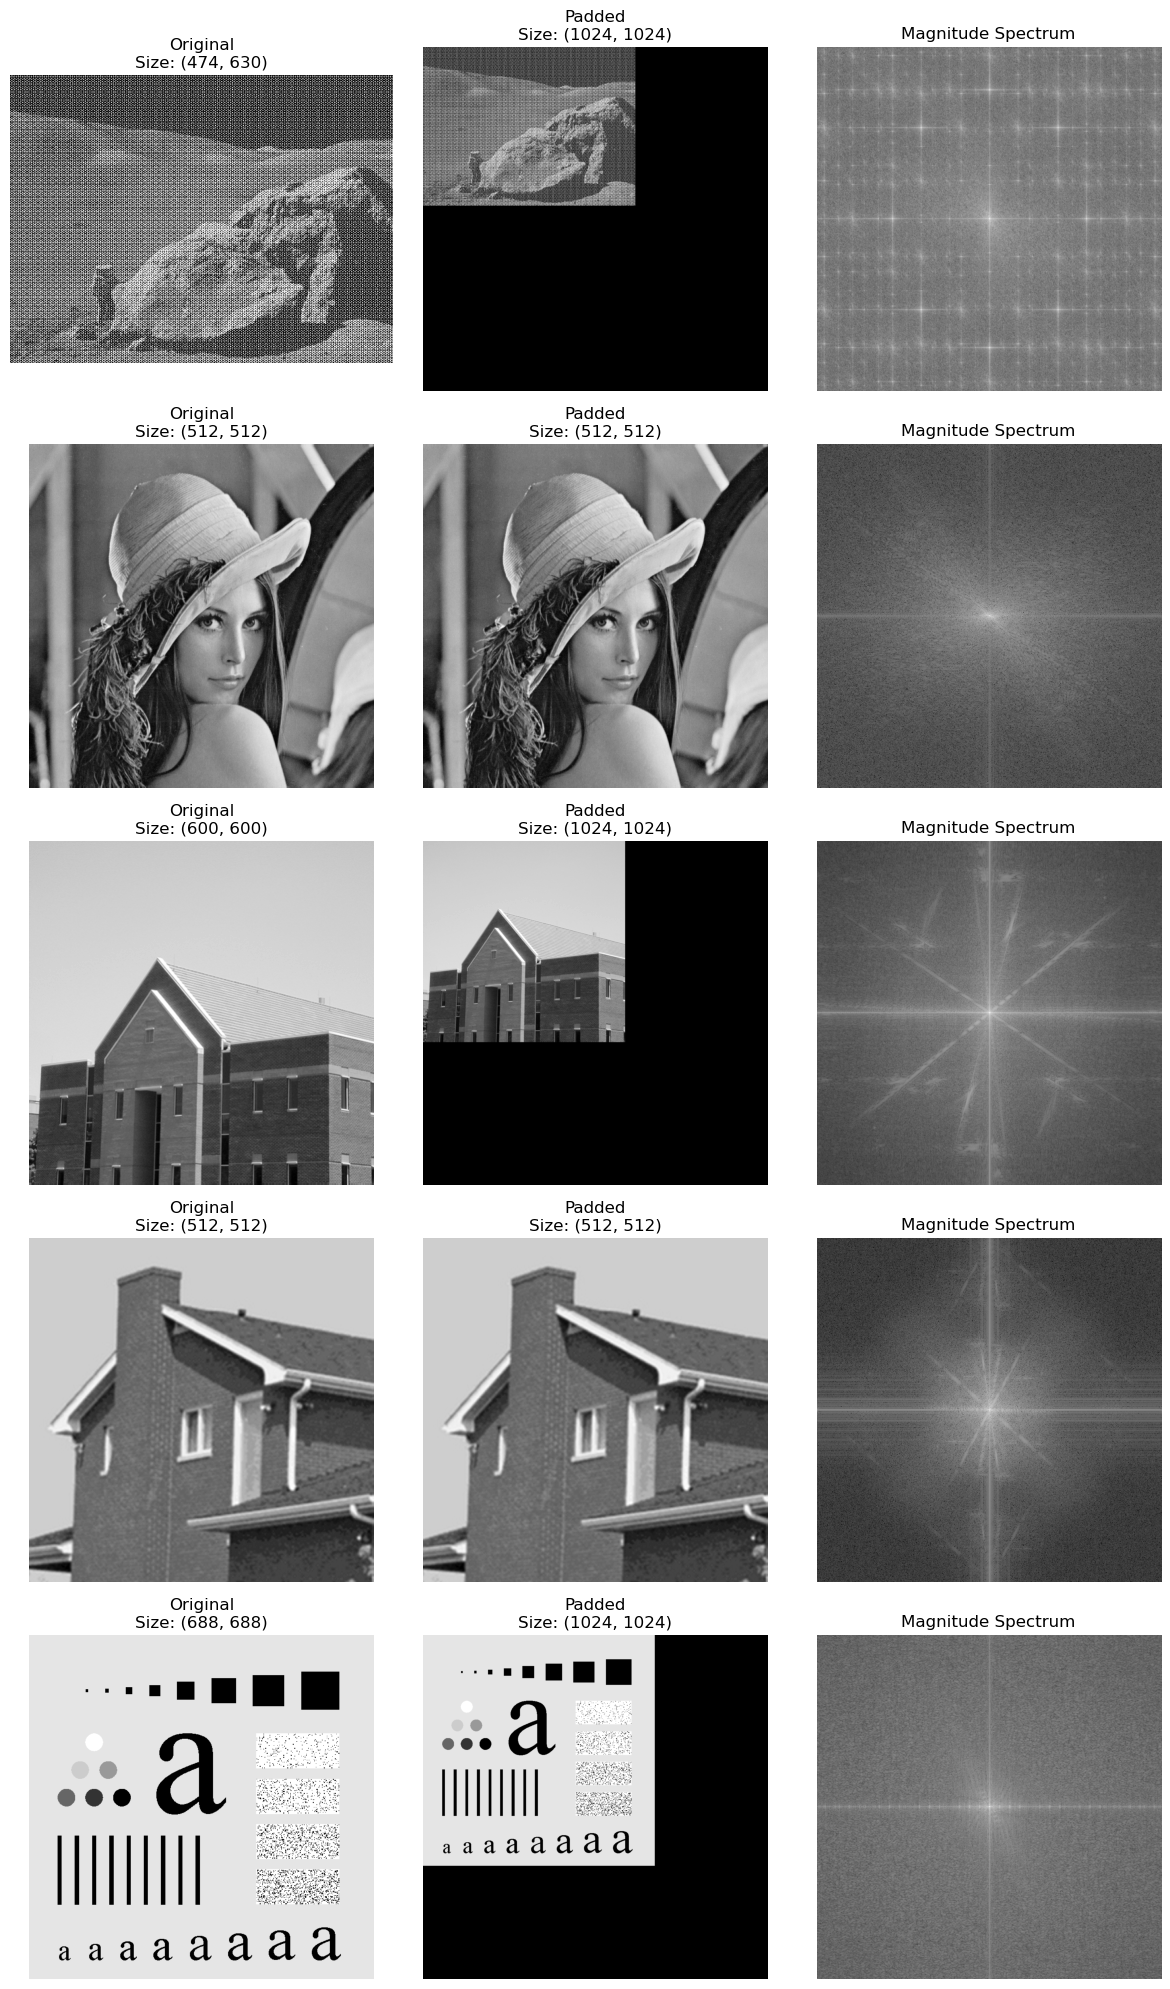

In [8]:
# Function to display the images and their FFT spectrum
def display_images_fft(images_info):
    # Set up the matplotlib figures and axes
    fig, axes = plt.subplots(len(images_info), 3, figsize=(12, 4 * len(images_info)))

    for ax_row, (path, info) in zip(axes, images_info.items()):
        # Apply FFT

        # Centralization of the image before FFT
        img_c = info['padded_image'] * ((-1) ** (np.indices(info['padded_image'].shape).sum(axis=0)))

        # apply FFT to the image
        f_shift = dft2D(img_c)

        # Display original image
        ax_row[0].imshow(info['original_image'], cmap='gray')
        ax_row[0].set_title(f"Original\nSize: {info['original_size']}")
        ax_row[0].axis('off')

        # Display padded image
        ax_row[1].imshow(info['padded_image'], cmap='gray')
        ax_row[1].set_title(f"Padded\nSize: {info['padded_size']}")
        ax_row[1].axis('off')

        # Display FFT spectrum
        magnitude_spectrum = 20 * np.log(np.abs(f_shift) + 1)  # Scale for better visualization
        ax_row[2].imshow(magnitude_spectrum, cmap='gray')
        ax_row[2].set_title("Magnitude Spectrum")
        ax_row[2].axis('off')

    plt.tight_layout()
    plt.savefig("problem5.png")
    plt.show()

# Now let's apply the DFT and display the images along with their FFT spectrum
display_images_fft(images_info)
